In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### Load & Preprocessing data

In [3]:
from scipy.io import arff

data = arff.loadarff('HTRU_2.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
y = df["class"].astype('bool')

In [4]:
print(f"X shape: {X.shape};") 
print(f"y shape: {y.shape};")

X shape: (17898, 8);
y shape: (17898,);


In [5]:
df.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [6]:
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,b'0'
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,b'0'
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,b'0'
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,b'0'
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,b'0'


In [7]:
df.columns

Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class'],
      dtype='object')

In [8]:
df['class'].value_counts(normalize=True)

b'0'    0.908426
b'1'    0.091574
Name: class, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


### Features correlation

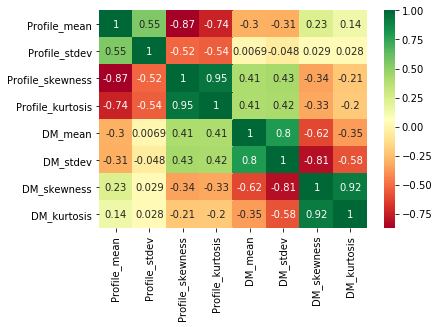

In [22]:
top_corr_features = df.corr().index
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Scatter plots

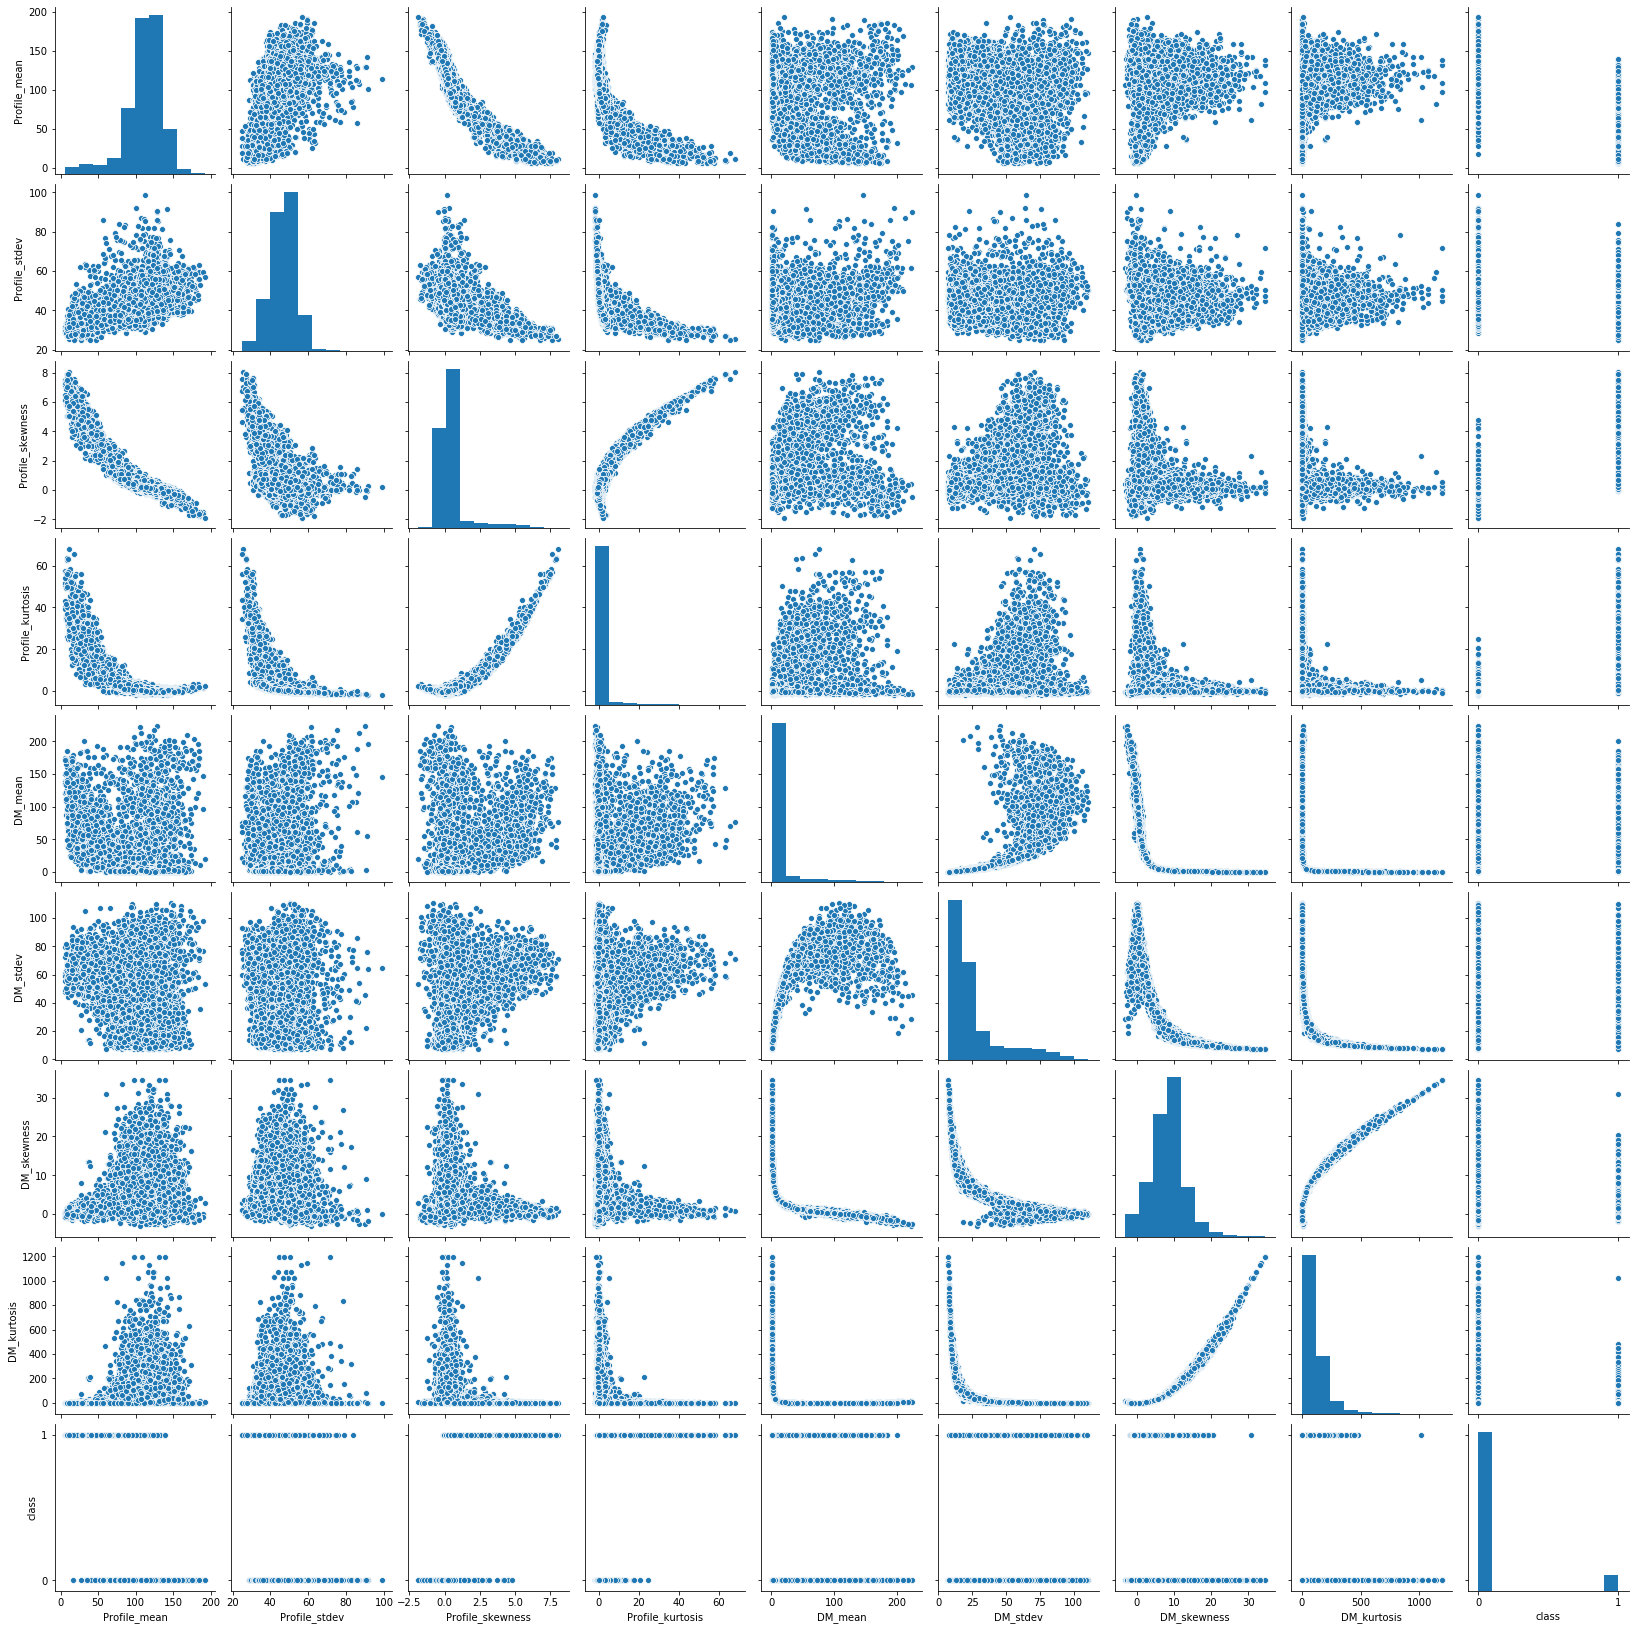

In [11]:
sns.pairplot(df)

### Split data on train test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
print(f"X_train shape: {X.shape}; y_train shape: {y.shape};")
print(f"X_test shape: {X.shape};  y_test shape: {y.shape};")

X_train shape: (17898, 8); y_train shape: (17898,);
X_test shape: (17898, 8);  y_test shape: (17898,);


### List of hyperparameters 

In [14]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.05, 0.1]
max_depth = [3, 4, 6]


param_grid = dict(
    learning_rate=learning_rate, 
    n_estimators=n_estimators,
    max_depth = max_depth
)

### Hyperparameters tunning

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

model = XGBClassifier()
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(model, param_grid, scoring="f1", cv=kfold, verbose=2, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] learning_rate=0.05, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=100, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=3, n_estimators=100, total=   0.2s
[CV] learning_rate=0.05, max_depth=3, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=100, total=   0.1s
[CV] learning_rate=0.05, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, n_estimators=200 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.05, max_depth=3, n_estimators=300 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=300, total=   0.5s
[CV] learning_rate=0.05, max_depth=3, n_estimators=300 ...............
[CV]  learning_rate=0.05, max_depth=3, n_estimators=300, total=   0.5s
[CV] learning_rate=0.05, max_depth=3, n_estimators=300 ...............
[CV]  

[CV] . learning_rate=0.1, max_depth=3, n_estimators=500, total=   0.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=4, n_estimators=200, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=4, n_estimators=200, total=   0.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=4, n_estimators=200, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   40.1s finished


In [16]:
params = grid.best_params_
res = [print(f"{key}: {val}") for key, val in params.items()]

learning_rate: 0.05
max_depth: 3
n_estimators: 100


### Training Neural Network on the best hyperparameters

In [17]:
model = XGBClassifier(seed=42,
                      n_estimators=params["n_estimators"],
                      max_depth=params["max_depth"],
                      learning_rate=params["learning_rate"])

In [18]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
y_pred = model.predict(X_test)

### Results

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
print(f"Accuracy:  {accuracy_score(y_test, model.predict(X_test))}")
print(f"Precision: {precision_score(y_test, model.predict(X_test), average='weighted')}")
print(f"Recall:    {recall_score(y_test, model.predict(X_test), average='weighted')}")

Accuracy:  1.0
Precision: 1.0
Recall:    1.0
